# Introduction to OCaml Jupyter

[ocaml-jupyter](https://akabe.github.io/ocaml-jupyter/) is an OCaml kernel for Jupyter. This provides a rich OCaml REPL interface on Jupyter: markdown/HTML documentation, LaTeX formula by MathJax, and embedding images like figures and charts.

You can interactively execute OCaml programs in a _cell_ (a textbox to input code):

In [1]:
let x = List.map (fun x -> x * 2) [1; 3; 5; 7; 9]

val x : int list = [2; 6; 10; 14; 18]


## jupyter.notebook

`jupyter.notebook` provides a way to control Jupyter from OCaml REPL in a notebook. For example, you can dynamically generate HTML, markdown, and images.

In [3]:
#thread ;;
#require "jupyter.notebook" ;;

In [4]:
JupyterNotebook.display "text/html" "<b>Hello, World!</b>"

Hello, World!

- : JupyterNotebook.display_id = <abstr>


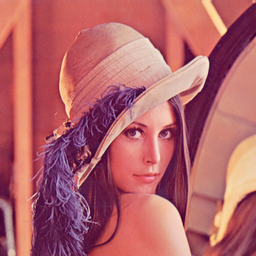

- : JupyterNotebook.display_id = <abstr>


In [5]:
let ic = open_in_bin "datasets/lenna.png" in
let n = in_channel_length ic in
let data = really_input_string ic n in
close_in ic ;
JupyterNotebook.display ~base64:true "image/png" data

## jupyter.archimedes

[Archimedes](http://archimedes.forge.ocamlcore.org/) is an easy-to-use 2D plotting library. OCaml Jupyter supports Archimedes charts in `jupyter.archimedes` sub-package. It can be installed by

```console
$ opam install -y cairo2 archimedes jupyter
```

In [7]:
#require "jupyter.archimedes"

This figure shows $y = sin(x)$ where $x \in [0, 10]$.

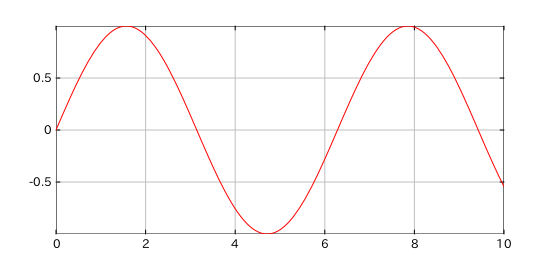

- : unit = ()


In [8]:
let vp = A.init ~w:560. ~h:260. ["jupyter"] in
A.Axes.box vp ;
A.set_color vp A.Color.red ;
A.fx vp sin 0.0 10.0 ;
A.close vp

We show a little complex example "random walk".

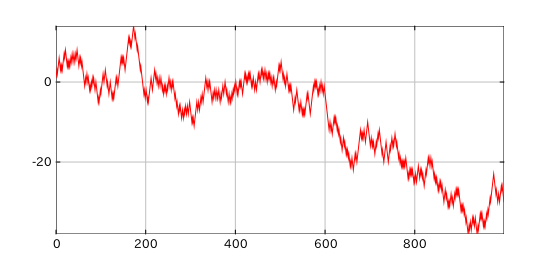

- : unit = ()


In [9]:
let rec walk acc p i =
  if i = 0 then List.rev acc else begin
    let q = if Random.bool () then succ p else pred p in
    walk (q :: acc) q (pred i)
  end in
let vp = A.init ~w:560. ~h:260. ["jupyter"] in
A.Axes.box vp ;
A.set_color vp A.Color.red ;
A.List.y vp ~style:`Lines (List.map float @@ walk [] 0 1000) ; (* Plot a random walk of 1000 points. *)
A.close vp